## KNN分类算法


In [2]:
from sklearn import datasets
#选择鸢尾花数据集
iris = datasets.load_iris()
#数据集里面的属性和特征
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
#特征名称
iris.feature_names  #花萼长宽和花瓣长宽

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
#查看数据个数与特征数
iris.data.shape

(150, 4)

In [6]:
#表示类别
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
X = iris.data    #特征数据
y = iris.target  #类别
X.shape

(150, 4)

In [8]:
#特征：花萼长款，花瓣长款（共四个算法）
#类别：0,1,2

#分类算法：通过学习或者训练150个样本，判断一朵鸢尾花属于哪一类

### 数据可视化

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# plt.scatter(X[:,0],X[:,1],c='r',marker='o')
# plt.show()

#我们要画一张能够体现不同类别的鸢尾花花萼长宽分布图
#散点图，帮助我们分析不同的特征之间的关系

#随便造一个鸢尾花数据
x = np.array([8.0,3.0,4.0,1.4])

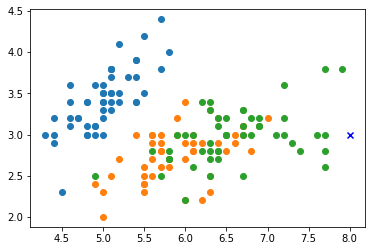

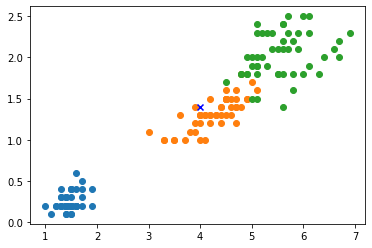

In [65]:
#比较运算（花式索引）
plt.scatter(X[y==0,0],X[y==0,1])  #花萼长宽
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(x[0],x[1],c='b',marker='x')
plt.show()

plt.scatter(X[y==0,2],X[y==0,3])  #花瓣长宽
plt.scatter(X[y==1,2],X[y==1,3])
plt.scatter(X[y==2,2],X[y==2,3])
plt.scatter(x[2],x[3],c='b',marker='x')
plt.show()

## KNN分类算法实现
idea:新的鸢尾花特征数据，更靠近哪一类，那就是哪一类

离样本点（测试点）最近的K个点，在最近的K个点里面，哪一类别最多，那就是哪一类

1.算距离

2.对距离排序并且去前K名

3.对这个K个样本点进行统计，得到哪一类最多

In [66]:
#1.算距离：坐标系里面，两点间距离怎么算，sqrt((x1 - x2)^2 + (y1 - y2)^2)
distance = np.sqrt(np.sum((X - x)**2,axis=1))  #对特征求和,算距离

#2.对距离排序求前K名
K = 10
y1 = y[np.argpartition(distance,K)[:K]]   #拿到类别

#3.统计计数
from collections import Counter  #自动计数
votes = Counter(y1)

print('新的鸢尾花属于第{}类'.format(votes.most_common(1)[0][0]))

新的鸢尾花属于第1类


### 函数封装

In [75]:
#封装
def KNN_classifer(K,X,y,x):
    #1.算距离：坐标系里面，两点间距离怎么算，sqrt((x1 - x2)^2 + (y1 - y2)^2)
    distance = np.sqrt(np.sum((X - x)**2,axis=1))  #对特征求和,算距离

    #2.对距离排序求前K名
    y1 = y[np.argpartition(distance,K)[:K]]  #拿到类别

    #3.统计计数
    from collections import Counter  #自动计数
    votes = Counter(y1)

    print('新的鸢尾花属于第{}类'.format(votes.most_common(1)[0][0]))
    
x = np.array([9.0,3.1,3.4,2.5])
KNN_classifer(9,X,y,x)
    
    

新的鸢尾花属于第1类


### 类封装

In [136]:
from collections import Counter
class KNNClassifier:
    
    def __init__(self,K=7):
        self.K = K
        self._X_train = None   #训练数据对外不可见
        self._y_train = None
        
    #学习训练数据
    def fit(self,X_train,y_train):
        self._X_train = X_train
        self._y_train = y_train
            
    #对多个样本做分类预测
    def predict(self,X_predict):  #对多个样本做分类预测
        y_predict = np.array([self._predict(x) for x in X_predict])
        return y_predict
            
    #对一个样本做分类预测    
    def predict_(self,x):
        distance = np.sqrt(np.sum((self._X_train - x)**2,axis=1))
        y1 = self._y_train[np.argpartition(distance,self.K)[:self.K]]
        votes = Counter(y1)
        return votes.most_common(1)[0][0]
        
knn = KNNClassifier()
knn.fit(X,y)


In [144]:
class KnnClassifier:
    def __init__(self,K):
        self.K = K
        self._X_train = None
        self._y_train = None
        
        #print(self._X_train)
        
    #学习训练数据
    def fit_(self,X_train,y_train):
        self._X_train = X_train
        self._y_train = y_train
    #对多个样本分类预测
    def predict(self,X_predict):
        y_predict = np.array([self._predict(x) for x in X_predict])
        return y_predict
    
    #对一个新样本分类预测
    def _predict(self,x):
        distance = np.sqrt(np.sum((self._X_train - x)**2,axis=1))
        y1 = self._y_train[np.argpartition(distance,self.K)[:self.K]] 
        votes = Counter(y1)
        return votes.most_common(1)[0][0]
        
knn = KnnClassifier(7)
knn.fit_(X,y)
knn.predict(X)
        
        

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [146]:
#预测准确度：自己实现下怎么计算